In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import font_manager, rc
font_path = "c:\WINDOWS\Fonts\GULIM.TTC"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rc('font', size=8) 

# 데이터 프레임 읽어오기

In [3]:
dataframe = pd.read_csv(r'C:\Users\hyssk\AICE_\open\train.csv')
dataframe.drop(columns='ID',inplace=True)
dataframe

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


# dataframe.info() 통해서 데이터 개수 및 데이터 정보 및 결측치 개수 확인

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96294 non-null  int64  
 1   대출기간          96294 non-null  object 
 2   근로기간          96294 non-null  object 
 3   주택소유상태        96294 non-null  object 
 4   연간소득          96294 non-null  int64  
 5   부채_대비_소득_비율   96294 non-null  float64
 6   총계좌수          96294 non-null  int64  
 7   대출목적          96294 non-null  object 
 8   최근_2년간_연체_횟수  96294 non-null  int64  
 9   총상환원금         96294 non-null  int64  
 10  총상환이자         96294 non-null  float64
 11  총연체금액         96294 non-null  float64
 12  연체계좌수         96294 non-null  float64
 13  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 10.3+ MB


수치형 데이터 칼럼은 9개, 카테고리형(범주형) 데이터 칼럼 5개

데이터 개수는 각 칼럼 96294개의 관측치 존재

데이터 결측치는 존재하지 않는 걸로 보이지만, 아직 정확하게 알 수 있는건 아니어서 직접 열어서 확인해보는 것이 Best

# dataframe.describe() 통해서 데이터 요약 통계량 확인

In [5]:
dataframe.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [6]:
categorical_columns = dataframe.select_dtypes('object').columns # 범주형 데이터 칼럼
numeric_columns = dataframe.select_dtypes('number').columns # 수치혀 데이터 칼럼

categorical_columns,numeric_columns

(Index(['대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급'], dtype='object'),
 Index(['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자',
        '총연체금액', '연체계좌수'],
       dtype='object'))

In [7]:
dataframe[numeric_columns].describe() # 수치형 데이터 칼럼의 요약 통게량

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


Insight

1. 부채 대비 소득 비율 파트에서 Q1 Q2 Q3는 12,18,25 인데, 최대값이 9999이다. (이상치는 아닌지 확인할 필요)

2. 최근 2년간 연체 횟수 max 값도 30도 확인해 볼 필요가 있다.

3. 총연체금액도 위와 같은 명목이다. 평균 54이고, std (표준편차)도 1414인데, 최대치는 75768은 높은 확률로 이상치일 가능성이 있다.

In [8]:
dataframe[categorical_columns].describe() # 범주형 데이터 칼럼의 요약 통계량

,대출기간,근로기간,주택소유상태,대출목적,대출등급
count,96294,96294,96294,96294,96294
unique,2,16,4,12,7
top,36 months,10+ years,MORTGAGE,부채 통합,B
freq,64479,31585,47934,55150,28817


unique는 ex) 대출기간이라는 (인자) 내에서의 수준(level) 또는 treatment(처리) 개수이다.

top은 제일 많이 나오는 수준

freq은 제일 많이 나오는 수준의 빈도수

Insight

1. 대출기간의 수준은 2개 근로기간 16개 주택소유상태 4개 대출목적 12개 대출등급 7개

2. 근로기간의 수준은 16개 너무 많은데 확인할 필요가 있어보임

# Insight 확인

1. 부채 대비 소득 비율 파트에서 Q1 Q2 Q3는 12,18,25 인데, 최대값이 9999이다. (이상치는 아닌지 확인할 필요)

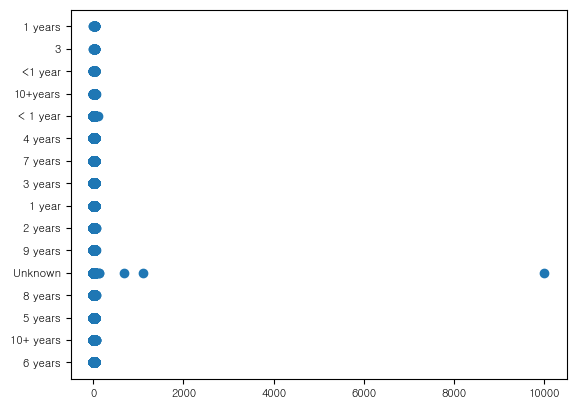

In [9]:
plt.figure()
plt.scatter(x=dataframe['부채_대비_소득_비율'],y=dataframe['근로기간'])
plt.show()


근로기간 수준이 Unknown인 자료에서 부채_대비_소득_비율이 10000인 값이 관측되었다.

In [10]:
dataframe[dataframe['부채_대비_소득_비율'] > 8000]

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,4440000,36 months,Unknown,MORTGAGE,0,9999.0,20,신용 카드,2,205356,85884.0,0.0,0.0,C


부채 대비 소득 비율이 9999인 사람이 존재한다.

부채 대비 소득 비율이란 (부채 / 연간 소득) 이다.

따라서 4440000 / 0 이어서 9999.0  으로 측정된 듯 하다.

사실 0으로 값을 나눈 다는 것은 정의되지 않지만, 값을 넣어주어야 하기에 9999로 정해서 넣은 것 같다.

따라서 본인은 이 값을 행을 제거시킴으로써 데이터 전처리를 하고자 한다.


In [11]:
dataframe.drop(index = 12498,inplace=True)

dataframe[dataframe['부채_대비_소득_비율'] > 8000] # 데이터 행 삭제가 잘 되었는지 확인

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급


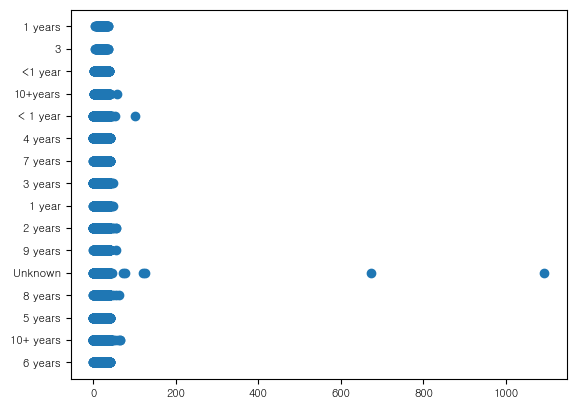

In [12]:
plt.figure()
plt.scatter(x=dataframe['부채_대비_소득_비율'],y=dataframe['근로기간'])
plt.show()

시각화로 다시 한번 확인하였다. 그러자 다시 한번 보이는 600 이상의 이상치들이 보이기 시작한다. 

In [13]:
dataframe[dataframe['부채_대비_소득_비율'] > 600]


,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
29129,14400000,36 months,Unknown,RENT,1440000,672.52,13,부채 통합,0,595344,442860.0,0.0,0.0,E
62765,7860000,36 months,Unknown,MORTGAGE,2124000,1092.52,25,신용 카드,2,0,0.0,0.0,0.0,D


나는 어떻게 해야할까? 

해당 2행이 정상적인 데이터면 어떻게하지?

이상치라면 데이터 사이언티스트로서 해결해야할까?

전처리를 어떻게 처리해야하는가?에 대한 고민이 된다.

어떤 기준을 가지고 전처리를 해야하는가..

우선은 삭제를 통해서 전처리해야겠다.

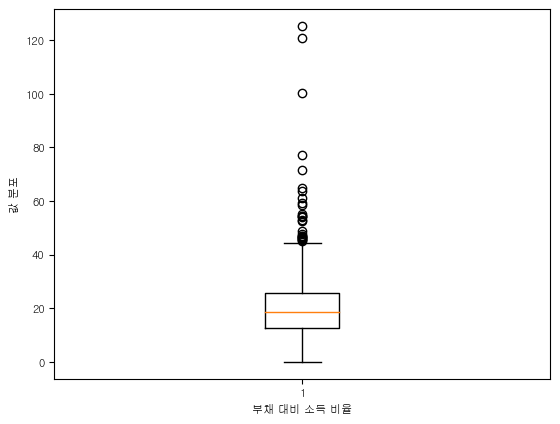

In [14]:
dataframe.drop(index=dataframe[dataframe['부채_대비_소득_비율'] > 600].index,inplace=True)

plt.figure()
plt.boxplot(dataframe['부채_대비_소득_비율'])
plt.xlabel('부채 대비 소득 비율')
plt.ylabel('값 분포')
plt.show()

가장 큰 3개의 이상치로 의심되는 관측치를 삭제한 뒤 Boxplot을 그려보았다.

그럼에도 불구하고 아직도 부채 대비 소득 비율의 이상치들이 많이 발견되었다.

# 2. 최근 2년간 연체 횟수 max 값도 30도 확인해 볼 필요가 있다.

In [15]:
dataframe[['최근_2년간_연체_횟수']].describe()

,최근_2년간_연체_횟수
count,96291.000000
mean,0.345650
std,0.919101
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,30.000000


In [16]:
dataframe[dataframe['최근_2년간_연체_횟수']>0]

print(f'최근 2년간 연체 횟수가 0 초과인 행의 비율은 : {(19900/96291)*100:.2f}% 입니다. ')
print(f'Q1 = 0.0, Q2 = 0.0, Q3 = 0.0, Mean: 0.34 입니다.')

최근 2년간 연체 횟수가 0 초과인 행의 비율은 : 20.67% 입니다. 
Q1 = 0.0, Q2 = 0.0, Q3 = 0.0, Mean: 0.34 입니다.


Q1 Q2 Q3 다 0값이고 Mean: 0.34이고 0인 값들이 약 80퍼센트에 가깝고, 0인 값들이 약 20퍼센트에 가깝다.

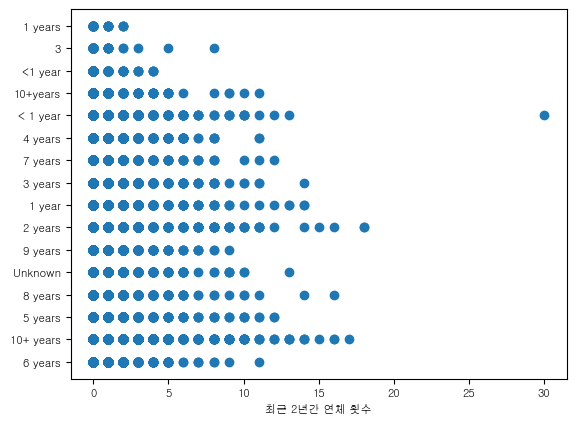

In [17]:
plt.figure()
plt.scatter(x = dataframe['최근_2년간_연체_횟수'], y= dataframe['근로기간'])
plt.xlabel('최근 2년간 연체 횟수')
plt.show()

In [18]:
dataframe.drop(index=57431,inplace=True)
dataframe

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


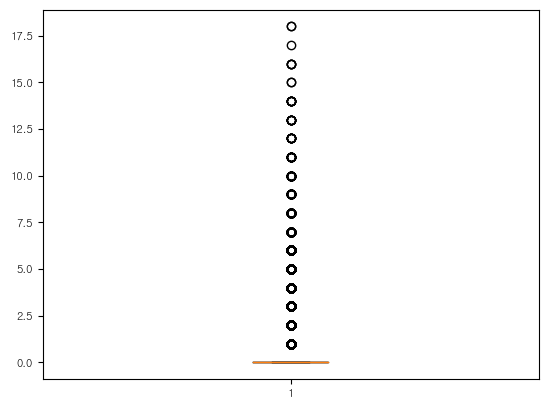

In [19]:
plt.figure()
plt.boxplot(x=dataframe['최근_2년간_연체_횟수'])
plt.show()

이상치가 아닐 수 있다는 생각이 든다. 우리가 80퍼센트의 관측치들이 0이어서 평균이 0에 가깝게 나타나는 것이지,

0이 아닌 값들이 이상치로 판단하는 것은 무리가 있어 보인다. 

따라서 본인은 이러한 이상치를 전처리를 하지않고 그대로 가져가는 것을 택한다.

# 3. 총연체금액도 위와 같은 명목이다. 평균 54이고, std (표준편차)도 1414인데, 최대치는 75768은 높은 확률로 이상치일 가능성이 있다.

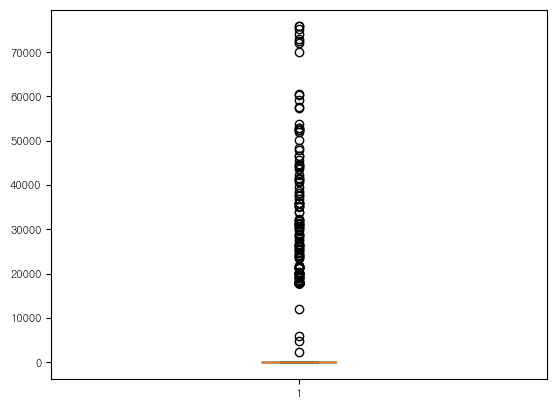

In [20]:
plt.figure()
plt.boxplot(x=dataframe['총연체금액'])
plt.show()

이상치가 아닐 수 있다는 생각이 든다. 위의 내용과 동일하다.

0이 아닌 값들이 이상치로 판단하는 것은 무리가 있어 보인다. 

따라서 본인은 이러한 이상치를 전처리를 하지않고 그대로 가져가는 것을 택한다.

# 시각화를 통한 Insight 도출하기 (시각화)

In [21]:
anova_frame=dataframe[['대출금액','대출기간','대출등급']]
print('대출 기간의 수준:', anova_frame['대출기간'].unique())
print('대출 등급의 수준:', anova_frame['대출등급'].unique())
print(anova_frame)
# 등급과 대출기간 평균이 -대출 금액의 평균의 차이가존재하는가?
fit=smf.ols('대출금액~ C(대출기간) + C(대출등급) + C(대출기간)*C(대출등급)',anova_frame).fit()
sm.stats.anova_lm(fit)

대출 기간의 수준: [' 36 months' ' 60 months']
대출 등급의 수준: ['C' 'B' 'A' 'D' 'F' 'G' 'E']
           대출금액        대출기간 대출등급
0      12480000   36 months    C
1      14400000   60 months    B
2      12000000   36 months    A
3      14400000   36 months    C
4      18000000   60 months    B
...         ...         ...  ...
96289  14400000   36 months    C
96290  28800000   60 months    E
96291  14400000   36 months    A
96292  15600000   36 months    D
96293   8640000   36 months    C

[96290 rows x 3 columns]


,df,sum_sq,mean_sq,F,PR(>F)
C(대출기간),1.0,1.664838e+18,1.664838e+18,18899.446461,0.000000e+00
C(대출등급),6.0,1.095244e+17,1.825406e+16,207.222400,1.042811e-263
C(대출기간):C(대출등급),6.0,1.792326e+16,2.987210e+15,33.911182,3.845315e-41
Residual,96276.0,8.480879e+18,8.808923e+13,NaN,NaN


대출기간 수준: [36 months / 60 months] 간의 대출금액 평균 차이는 없다라는 가설을 기각

대출등급 수준: ['C' 'B' 'A' 'D' 'F' 'G' 'E'] 간의 대출금액 평균 차이는 없다라는 가설을 기각

교호효과는 없다라는 가설도 기각된다.

즉, 
1. 대출 기간 수준 간의 적어도 대출 금액 평균 차이가 존재
2. 대출 등급 수준 간의 적어도 대출 금액 평균 차이가 존재
3. 대출 등급과 대출 기간 간의 교호효과가 존재한다.


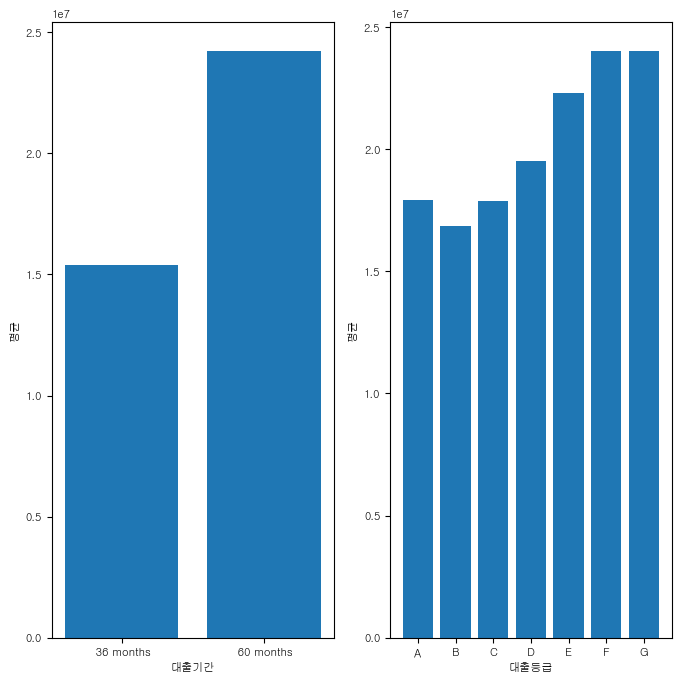

In [22]:
mean_period_level = anova_frame[['대출기간','대출금액']].groupby('대출기간').mean()
mean_grade_level = anova_frame[['대출등급','대출금액']].groupby('대출등급').mean()

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.bar(list(mean_period_level.index),[15383401.16324157,24223658.65157944])
plt.xlabel('대출기간')
plt.ylabel('평균')
plt.subplot(1,2,2)
plt.bar(list(mean_grade_level.index),[17905794.7770093,16868082.72894472,
                                      17890527.85923754,19534187.82296113,
                                      22321207.67033864,24005174.00204708,24020785.71428571])
plt.xlabel('대출등급')
plt.ylabel('평균')
plt.show()

대출기간 수준: [36 months / 60 months] 간의 대출금액 평균 차이는 없다라는 가설을 기각

대출 기간 수준의 평균 차이가 나므로 가설 기각에 힘이 실린다. 

대출등급 수준: ['C' 'B' 'A' 'D' 'F' 'G' 'E'] 간의 대출금액 평균 차이는 없다라는 가설을 기각

대출금액 간의 평균 차이가 적어도 하나라도 있으므로 가설 기각에 힘이 실린다.

# 근로기간 Column의 이상한 점 (1 years와 1 year차이 파악 / 10+ years와 10+years의 차이 파악 / < 1 year와 <1 year 차이 파악와 3 years와 3과의 차이 파악)

즉, 근로기간의 Level에 대한 통일이 전혀 안되어있는 걸로 보인다.

## groupby(범주형 칼럼명).mean() 오류 디버깅

If you got a similar TypeError after a groupby operation (e.g. TypeError: Could not convert ace to numeric), then you probably have pandas>=2.0.

groupby.mean() has numeric_only= argument whose default value was True in the past but since pandas 2.0, its default value is False. An implication is that string columns are not dropped when a statistical method such as mean or std is called on the groupby object (as was done in the past). To solve the issue, pass numeric_only=True.

즉, 2.0 이하 버전에서는 numeric_only = True 가 Default 값이었지만, 2.0 이상 버전에서는 numeric_only (파라미터)가 False 로 변경 되면서 문자열 칼럼은 통계적 방법(평균/표준편차가 호출될 때, drop(떨어져나가지)않아서 발생되는 오류)

numeric_only=True를 사용해서 mean(),std()를 구해야함

In [23]:
duration = dataframe.groupby('근로기간').mean(numeric_only=True)
duration

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
근로기간,,,,,,,,,
1 year,1.738036e+07,8.809890e+07,18.719027,24.215875,0.358617,817702.337014,406286.605857,35.796447,0.006721
1 years,1.765875e+07,8.717464e+07,19.903929,24.607143,0.285714,663433.285714,386440.500000,0.000000,0.017857
10+ years,1.970918e+07,1.029958e+08,19.567803,27.019566,0.384138,861142.107203,459609.321513,63.587652,0.006617
10+years,2.036116e+07,1.043049e+08,19.632199,27.112723,0.427455,905450.745536,495090.321429,42.549107,0.002232
2 years,1.766202e+07,9.084845e+07,18.617898,24.341065,0.373964,792533.338225,414199.011124,67.809231,0.005799
3,1.540079e+07,8.253461e+07,19.423933,23.134831,0.337079,730848.539326,298700.764045,0.000000,0.000000
3 years,1.778408e+07,9.238047e+07,18.828827,24.195621,0.316713,819721.392956,412578.176494,51.683419,0.005276
4 years,1.805441e+07,9.273204e+07,18.773479,24.273801,0.301897,833416.748031,426474.304939,43.391553,0.004295
5 years,1.800684e+07,9.435270e+07,18.941841,24.632833,0.320035,818092.547926,425711.701324,38.501677,0.005296


<Figure size 1200x1200 with 0 Axes>

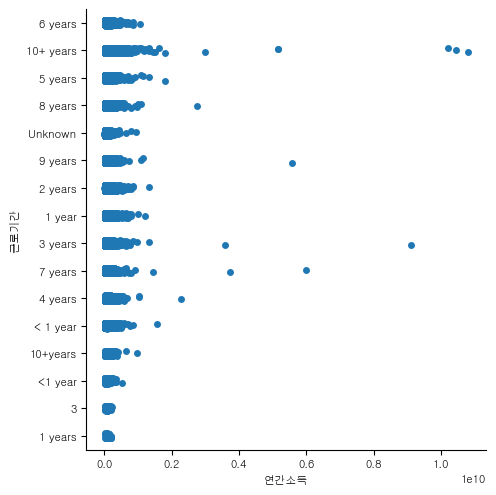

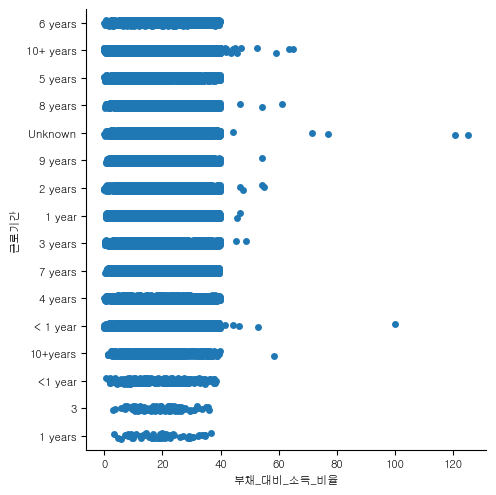

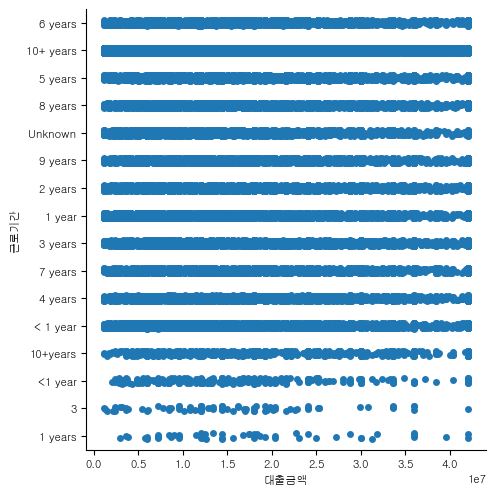

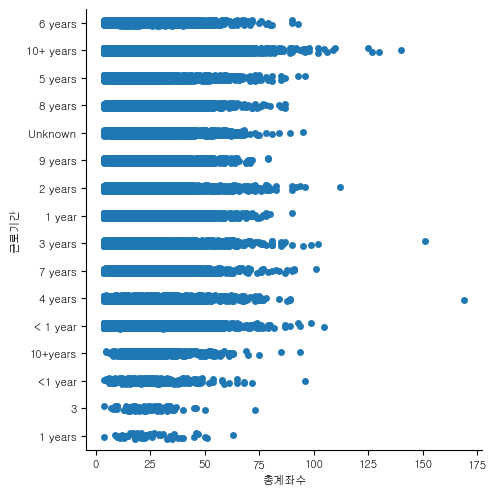

In [24]:
plt.figure(figsize=(12,12))
sns.catplot(data=dataframe,x='연간소득',y='근로기간')
sns.catplot(data=dataframe,x='부채_대비_소득_비율',y='근로기간')
sns.catplot(data=dataframe,x='대출금액',y='근로기간')
sns.catplot(data=dataframe,x='총계좌수',y='근로기간')
plt.show()

[1 year과 1 years] level을 보면, 1 years는 항상 1 year 값보다 큰 적이 없다 (즉, 항상 포함된다.)

다른 level 쌍도 동일하게 항상 포함되는 형태를 띄고있음. 

따라서 통합시켜도 될 것 같은 생각이 든다. mean 값도 그렇게 큰 차이를 띄지 않으므로 자료 통합을 할 필요성이 있어보임.

[1 years -> 1 year], [3 -> 3 years], [<1 year -> < 1 year], [10+years -> 10+ years]

In [25]:
dataframe['근로기간'].value_counts()

근로기간
10+ years    31585
2 years       8450
< 1 year      7773
3 years       7581
1 year        6249
Unknown       5668
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

# pandas.dataframe.replace(inplace) 에 대한 오류

inplace를 통해서 변경된 내용을 저장하려고했는데, 그렇게 되지 않았다. It doesn't work

inplace와 같은효과를 내려면 대입 연산을 통해서 넣어줘야 한다.

1 years: 56 개 | 1 year: 6249 개  -> 1 year: 6305 개

3: 89 개 | 3 years: 7581 개 -> 3 years: 7670 개

<1 year: 370 개 | < 1 year: 7773 개 -> <1 year: 8143 개

10+years : 896 개 | 10+ years: 31585 개 -> 10+ years: 32481 개로 변경됨

In [26]:
dataframe['근로기간']=dataframe['근로기간'].replace('1 years','1 year')
dataframe['근로기간']=dataframe['근로기간'].replace('3','3 years')
dataframe['근로기간']=dataframe['근로기간'].replace('<1 year','< 1 year')
dataframe['근로기간']=dataframe['근로기간'].replace('10+years','10+ years')
dataframe['근로기간'].value_counts()

근로기간
10+ years    32481
2 years       8450
< 1 year      8143
3 years       7670
1 year        6305
Unknown       5668
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
Name: count, dtype: int64